In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('logistic_regression.csv')
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


In [3]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [4]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [5]:
df.isnull().sum()*100/df.shape[0]

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443401
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

In [6]:
df['emp_title'].value_counts()

emp_title
Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: count, Length: 173105, dtype: int64

In [7]:
df['emp_title'].nunique()

173105

In [8]:
df['emp_title'].fillna(df['emp_title'].mode()[0], inplace=True)

In [9]:
df.isnull().sum()*100/df.shape[0]

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               0.000000
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443401
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

In [10]:
df['title'].value_counts()

title
Debt consolidation            152472
Credit card refinancing        51487
Home improvement               15264
Other                          12930
Debt Consolidation             11608
                               ...  
Graduation/Travel Expenses         1
Daughter's Wedding Bill            1
gotta move                         1
creditcardrefi                     1
Toxic Debt Payoff                  1
Name: count, Length: 48816, dtype: int64

In [11]:
df['title'].nunique()

48816

In [12]:
df['title']

0                        Vacation
1              Debt consolidation
2         Credit card refinancing
3         Credit card refinancing
4           Credit Card Refinance
                   ...           
396025         Debt consolidation
396026         Debt consolidation
396027       pay off credit cards
396028              Loanforpayoff
396029          Toxic Debt Payoff
Name: title, Length: 396030, dtype: object

In [13]:
df['title'].fillna(df['title'].mode()[0], inplace= True)

In [14]:
df.isnull().sum()*100/df.shape[0]

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               0.000000
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.000000
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

In [15]:
df['emp_length']

0         10+ years
1           4 years
2          < 1 year
3           6 years
4           9 years
            ...    
396025      2 years
396026      5 years
396027    10+ years
396028    10+ years
396029    10+ years
Name: emp_length, Length: 396030, dtype: object

In [16]:
df['emp_length'].value_counts()

emp_length
10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: count, dtype: int64

In [17]:
df['emp_length'].fillna(df['emp_length'].mode()[0], inplace= True)

In [18]:
df.isnull().sum()*100/df.shape[0]

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               0.000000
emp_length              0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.000000
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

In [19]:
df['revol_util']

0         41.8
1         53.3
2         92.2
3         21.5
4         69.8
          ... 
396025    34.3
396026    95.7
396027    66.9
396028    53.8
396029    91.3
Name: revol_util, Length: 396030, dtype: float64

In [20]:
df['revol_util'].value_counts()

revol_util
0.00      2213
53.00      752
60.00      739
61.00      734
55.00      730
          ... 
892.30       1
110.10       1
123.00       1
49.63        1
128.10       1
Name: count, Length: 1226, dtype: int64

In [21]:
df['revol_util'].mean()

53.79174863677942

In [22]:
df['revol_util'].median()

54.8

In [23]:
df['revol_util'].fillna(df['revol_util'].mean(), inplace=True)

In [24]:
df.isnull().sum()*100/df.shape[0]

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               0.000000
emp_length              0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.000000
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.000000
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

In [25]:
df.isnull().sum()*100/df.shape[0]

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               0.000000
emp_length              0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.000000
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.000000
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

In [26]:
df['mort_acc']

0         0.0
1         3.0
2         0.0
3         0.0
4         1.0
         ... 
396025    0.0
396026    1.0
396027    0.0
396028    5.0
396029    NaN
Name: mort_acc, Length: 396030, dtype: float64

In [27]:
df['mort_acc'].value_counts()

mort_acc
0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: count, dtype: int64

In [28]:
df['mort_acc'].fillna(df['mort_acc'].mode()[0], inplace=True)

In [29]:
df['pub_rec_bankruptcies']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
396025    0.0
396026    0.0
396027    0.0
396028    0.0
396029    0.0
Name: pub_rec_bankruptcies, Length: 396030, dtype: float64

In [30]:
df['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
0.0    350380
1.0     42790
2.0      1847
3.0       351
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2
Name: count, dtype: int64

In [31]:
df['pub_rec_bankruptcies'].fillna(df['pub_rec_bankruptcies'].mode()[0], inplace=True)

In [32]:
df.isnull().sum()*100/df.shape[0]

loan_amnt               0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
sub_grade               0.0
emp_title               0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
title                   0.0
dti                     0.0
earliest_cr_line        0.0
open_acc                0.0
pub_rec                 0.0
revol_bal               0.0
revol_util              0.0
total_acc               0.0
initial_list_status     0.0
application_type        0.0
mort_acc                0.0
pub_rec_bankruptcies    0.0
address                 0.0
dtype: float64

In [33]:
df.drop(['emp_title','title'],axis =1, inplace= True)

In [34]:
df.isnull().sum()*100/df.shape[0]

loan_amnt               0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
sub_grade               0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
dti                     0.0
earliest_cr_line        0.0
open_acc                0.0
pub_rec                 0.0
revol_bal               0.0
revol_util              0.0
total_acc               0.0
initial_list_status     0.0
application_type        0.0
mort_acc                0.0
pub_rec_bankruptcies    0.0
address                 0.0
dtype: float64

In [35]:
pd.set_option('display.max_columns', None)

In [36]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_length            396030 non-null  object 
 7   home_ownership        396030 non-null  object 
 8   annual_inc            396030 non-null  float64
 9   verification_status   396030 non-null  object 
 10  issue_d               396030 non-null  object 
 11  loan_status           396030 non-null  object 
 12  purpose               396030 non-null  object 
 13  dti                   396030 non-null  float64
 14  earliest_cr_line      396030 non-null  object 
 15  

In [38]:
cat=[]
num=[]


for i in df.columns:
    if df[i].dtypes=='O':
        cat.append(i)
    else:
        num.append(i)

In [39]:
cat

['term',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'earliest_cr_line',
 'initial_list_status',
 'application_type',
 'address']

In [40]:
num

['loan_amnt',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'mort_acc',
 'pub_rec_bankruptcies']

In [41]:
df['term'].value_counts()

term
 36 months    302005
 60 months     94025
Name: count, dtype: int64

In [42]:
df['term']= df['term'].str.replace(" months", "")

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_length            396030 non-null  object 
 7   home_ownership        396030 non-null  object 
 8   annual_inc            396030 non-null  float64
 9   verification_status   396030 non-null  object 
 10  issue_d               396030 non-null  object 
 11  loan_status           396030 non-null  object 
 12  purpose               396030 non-null  object 
 13  dti                   396030 non-null  float64
 14  earliest_cr_line      396030 non-null  object 
 15  

In [44]:
df['term']=df['term'].astype('int')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  int32  
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_length            396030 non-null  object 
 7   home_ownership        396030 non-null  object 
 8   annual_inc            396030 non-null  float64
 9   verification_status   396030 non-null  object 
 10  issue_d               396030 non-null  object 
 11  loan_status           396030 non-null  object 
 12  purpose               396030 non-null  object 
 13  dti                   396030 non-null  float64
 14  earliest_cr_line      396030 non-null  object 
 15  

In [46]:
df['grade'].value_counts()

grade
B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054
Name: count, dtype: int64

In [47]:
df['sub_grade'].value_counts()

sub_grade
B3    26655
B4    25601
C1    23662
C2    22580
B2    22495
B5    22085
C3    21221
C4    20280
B1    19182
A5    18526
C5    18244
D1    15993
A4    15789
D2    13951
D3    12223
D4    11657
A3    10576
A1     9729
D5     9700
A2     9567
E1     7917
E2     7431
E3     6207
E4     5361
E5     4572
F1     3536
F2     2766
F3     2286
F4     1787
F5     1397
G1     1058
G2      754
G3      552
G4      374
G5      316
Name: count, dtype: int64

In [48]:
df['emp_length'].value_counts()

emp_length
10+ years    144342
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: count, dtype: int64

In [49]:
df['grade'].value_counts()

grade
B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054
Name: count, dtype: int64

In [50]:
from sklearn.preprocessing import LabelEncoder

In [51]:
grade_le=LabelEncoder()

In [52]:
df['grade']=grade_le.fit_transform(df['grade'])

In [53]:
df['grade'].value_counts()

grade
1    116018
2    105987
0     64187
3     63524
4     31488
5     11772
6      3054
Name: count, dtype: int64

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  int32  
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  int32  
 5   sub_grade             396030 non-null  object 
 6   emp_length            396030 non-null  object 
 7   home_ownership        396030 non-null  object 
 8   annual_inc            396030 non-null  float64
 9   verification_status   396030 non-null  object 
 10  issue_d               396030 non-null  object 
 11  loan_status           396030 non-null  object 
 12  purpose               396030 non-null  object 
 13  dti                   396030 non-null  float64
 14  earliest_cr_line      396030 non-null  object 
 15  

In [55]:
df['sub_grade'].value_counts()

sub_grade
B3    26655
B4    25601
C1    23662
C2    22580
B2    22495
B5    22085
C3    21221
C4    20280
B1    19182
A5    18526
C5    18244
D1    15993
A4    15789
D2    13951
D3    12223
D4    11657
A3    10576
A1     9729
D5     9700
A2     9567
E1     7917
E2     7431
E3     6207
E4     5361
E5     4572
F1     3536
F2     2766
F3     2286
F4     1787
F5     1397
G1     1058
G2      754
G3      552
G4      374
G5      316
Name: count, dtype: int64

In [56]:
sub_grade_le=LabelEncoder()

In [57]:
df['sub_grade']=sub_grade_le.fit_transform(df['sub_grade'])

In [58]:
df['sub_grade'].value_counts()

sub_grade
7     26655
8     25601
10    23662
11    22580
6     22495
9     22085
12    21221
13    20280
5     19182
4     18526
14    18244
15    15993
3     15789
16    13951
17    12223
18    11657
2     10576
0      9729
19     9700
1      9567
20     7917
21     7431
22     6207
23     5361
24     4572
25     3536
26     2766
27     2286
28     1787
29     1397
30     1058
31      754
32      552
33      374
34      316
Name: count, dtype: int64

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  int32  
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  int32  
 5   sub_grade             396030 non-null  int32  
 6   emp_length            396030 non-null  object 
 7   home_ownership        396030 non-null  object 
 8   annual_inc            396030 non-null  float64
 9   verification_status   396030 non-null  object 
 10  issue_d               396030 non-null  object 
 11  loan_status           396030 non-null  object 
 12  purpose               396030 non-null  object 
 13  dti                   396030 non-null  float64
 14  earliest_cr_line      396030 non-null  object 
 15  

In [60]:
df['emp_length'].value_counts()

emp_length
10+ years    144342
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: count, dtype: int64

In [61]:
lens=list(df['emp_length'].unique())
lens

['10+ years',
 '4 years',
 '< 1 year',
 '6 years',
 '9 years',
 '2 years',
 '3 years',
 '8 years',
 '7 years',
 '5 years',
 '1 year']

In [62]:
val=[10,4,0,6,9,2,3,8,7,5,1]

In [63]:
df.replace(to_replace=lens, value=val, inplace= True)

In [64]:
df['emp_length'].value_counts()

emp_length
10    144342
2      35827
0      31725
3      31665
5      26495
1      25882
4      23952
6      20841
7      20819
8      19168
9      15314
Name: count, dtype: int64

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  int32  
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  int32  
 5   sub_grade             396030 non-null  int32  
 6   emp_length            396030 non-null  int64  
 7   home_ownership        396030 non-null  object 
 8   annual_inc            396030 non-null  float64
 9   verification_status   396030 non-null  object 
 10  issue_d               396030 non-null  object 
 11  loan_status           396030 non-null  object 
 12  purpose               396030 non-null  object 
 13  dti                   396030 non-null  float64
 14  earliest_cr_line      396030 non-null  object 
 15  

In [66]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: count, dtype: int64

In [67]:
df.replace(to_replace=['OTHER','NONE', 'ANY'], value=['MORTGAGE']*3, inplace= True)

In [68]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198494
RENT        159790
OWN          37746
Name: count, dtype: int64

In [69]:
from sklearn.preprocessing import OneHotEncoder

In [70]:
ofe_home_own=OneHotEncoder(sparse_output= False)

In [71]:
arr= ofe_home_own.fit_transform(df[['home_ownership']])
arr

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [72]:
cols=ofe_home_own.categories_[0]
cols

array(['MORTGAGE', 'OWN', 'RENT'], dtype=object)

In [73]:
df_home=pd.DataFrame(arr, columns=cols)
df_home

,MORTGAGE,OWN,RENT
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,1.0,0.0,0.0
...,...,...,...
396025,0.0,0.0,1.0
396026,1.0,0.0,0.0
396027,0.0,0.0,1.0
396028,1.0,0.0,0.0


In [74]:
df_home.corr()

,MORTGAGE,OWN,RENT
MORTGAGE,1.000000,-0.325366,-0.824420
OWN,-0.325366,1.000000,-0.266944
RENT,-0.824420,-0.266944,1.000000


<Axes: >

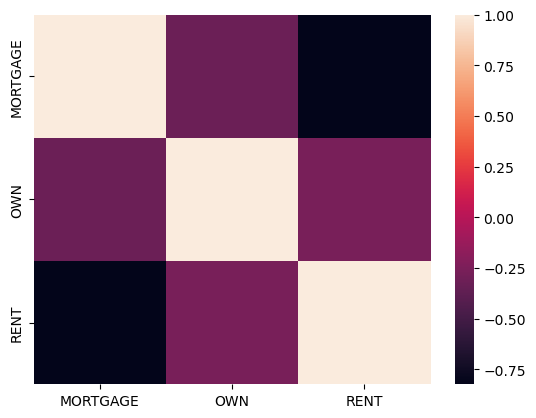

In [75]:
import seaborn as sns
sns.heatmap(df_home.corr())

In [76]:
df_home.drop(['MORTGAGE'], axis=1, inplace=True)

In [77]:
df_home

,OWN,RENT
0,0.0,1.0
1,0.0,0.0
2,0.0,1.0
3,0.0,1.0
4,0.0,0.0
...,...,...
396025,0.0,1.0
396026,0.0,0.0
396027,0.0,1.0
396028,0.0,0.0


In [78]:
df_home.corr()

,OWN,RENT
OWN,1.000000,-0.266944
RENT,-0.266944,1.000000


<Axes: >

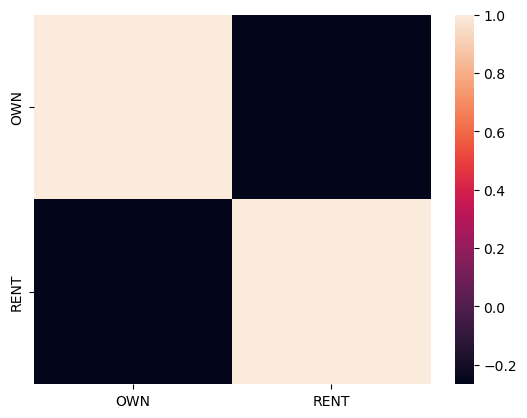

In [79]:
sns.heatmap(df_home.corr())

In [80]:
df.drop('home_ownership', axis= 1, inplace=True)

In [81]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36,11.44,329.48,1,8,10,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36,11.99,265.68,1,9,4,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36,10.49,506.97,1,7,0,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36,6.49,220.65,0,1,6,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60,17.27,609.33,2,14,9,55000.0,Verified,Apr-2013,Charged Off,credit_card,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,1,8,2,40000.0,Source Verified,Oct-2015,Fully Paid,debt_consolidation,15.63,Nov-2004,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,21000.0,36,12.29,700.42,2,10,5,110000.0,Source Verified,Feb-2015,Fully Paid,debt_consolidation,21.45,Feb-2006,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,5000.0,36,9.99,161.32,1,5,10,56500.0,Verified,Oct-2013,Fully Paid,debt_consolidation,17.56,Mar-1997,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,21000.0,60,15.31,503.02,2,11,10,64000.0,Verified,Aug-2012,Fully Paid,debt_consolidation,15.88,Nov-1990,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


In [82]:
df=pd.concat([df, df_home], axis=1)

In [83]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,OWN,RENT
0,10000.0,36,11.44,329.48,1,8,10,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",0.0,1.0
1,8000.0,36,11.99,265.68,1,9,4,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",0.0,0.0
2,15600.0,36,10.49,506.97,1,7,0,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",0.0,1.0
3,7200.0,36,6.49,220.65,0,1,6,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",0.0,1.0
4,24375.0,60,17.27,609.33,2,14,9,55000.0,Verified,Apr-2013,Charged Off,credit_card,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,1,8,2,40000.0,Source Verified,Oct-2015,Fully Paid,debt_consolidation,15.63,Nov-2004,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723",0.0,1.0
396026,21000.0,36,12.29,700.42,2,10,5,110000.0,Source Verified,Feb-2015,Fully Paid,debt_consolidation,21.45,Feb-2006,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ...",0.0,0.0
396027,5000.0,36,9.99,161.32,1,5,10,56500.0,Verified,Oct-2013,Fully Paid,debt_consolidation,17.56,Mar-1997,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7...",0.0,1.0
396028,21000.0,60,15.31,503.02,2,11,10,64000.0,Verified,Aug-2012,Fully Paid,debt_consolidation,15.88,Nov-1990,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL...",0.0,0.0


In [84]:
df['verification_status'].value_counts()

verification_status
Verified           139563
Source Verified    131385
Not Verified       125082
Name: count, dtype: int64

In [85]:
df['verification_status'].replace(to_replace=['Verified','Source Verified','Not Verified'], value=[1,2,0], inplace= True)

In [86]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,OWN,RENT
0,10000.0,36,11.44,329.48,1,8,10,117000.0,0,Jan-2015,Fully Paid,vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",0.0,1.0
1,8000.0,36,11.99,265.68,1,9,4,65000.0,0,Jan-2015,Fully Paid,debt_consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",0.0,0.0
2,15600.0,36,10.49,506.97,1,7,0,43057.0,2,Jan-2015,Fully Paid,credit_card,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",0.0,1.0
3,7200.0,36,6.49,220.65,0,1,6,54000.0,0,Nov-2014,Fully Paid,credit_card,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",0.0,1.0
4,24375.0,60,17.27,609.33,2,14,9,55000.0,1,Apr-2013,Charged Off,credit_card,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,1,8,2,40000.0,2,Oct-2015,Fully Paid,debt_consolidation,15.63,Nov-2004,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723",0.0,1.0
396026,21000.0,36,12.29,700.42,2,10,5,110000.0,2,Feb-2015,Fully Paid,debt_consolidation,21.45,Feb-2006,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ...",0.0,0.0
396027,5000.0,36,9.99,161.32,1,5,10,56500.0,1,Oct-2013,Fully Paid,debt_consolidation,17.56,Mar-1997,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7...",0.0,1.0
396028,21000.0,60,15.31,503.02,2,11,10,64000.0,1,Aug-2012,Fully Paid,debt_consolidation,15.88,Nov-1990,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL...",0.0,0.0


In [87]:
cat

['term',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'earliest_cr_line',
 'initial_list_status',
 'application_type',
 'address']

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  int32  
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  int32  
 5   sub_grade             396030 non-null  int32  
 6   emp_length            396030 non-null  int64  
 7   annual_inc            396030 non-null  float64
 8   verification_status   396030 non-null  int64  
 9   issue_d               396030 non-null  object 
 10  loan_status           396030 non-null  object 
 11  purpose               396030 non-null  object 
 12  dti                   396030 non-null  float64
 13  earliest_cr_line      396030 non-null  object 
 14  open_acc              396030 non-null  float64
 15  

In [89]:
df['loan_status'].value_counts()

loan_status
Fully Paid     318357
Charged Off     77673
Name: count, dtype: int64

In [90]:
loan_status_le=LabelEncoder()
df['loan_status']=loan_status_le.fit_transform(df['loan_status'])
df['loan_status'].value_counts()

loan_status
1    318357
0     77673
Name: count, dtype: int64

In [91]:
df['initial_list_status'].value_counts()

initial_list_status
f    238066
w    157964
Name: count, dtype: int64

In [92]:
initial_list_status_le=LabelEncoder()
df['initial_list_status']=initial_list_status_le.fit_transform(df['initial_list_status'])
df['initial_list_status'].value_counts()

initial_list_status
0    238066
1    157964
Name: count, dtype: int64

In [93]:
df.drop('address', axis= 1, inplace=True)

In [94]:
df['earliest_cr_line'].value_counts()

earliest_cr_line
Oct-2000    3017
Aug-2000    2935
Oct-2001    2896
Aug-2001    2884
Nov-2000    2736
            ... 
Jul-1958       1
Nov-1957       1
Jan-1953       1
Jul-1955       1
Aug-1959       1
Name: count, Length: 684, dtype: int64

In [95]:
date_col=pd.DatetimeIndex(df['issue_d'])

In [96]:
df['issue_d_year'] = date_col.year
df['issue_d_month'] = date_col.month

In [97]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,OWN,RENT,issue_d_year,issue_d_month
0,10000.0,36,11.44,329.48,1,8,10,117000.0,0,Jan-2015,1,vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,1,INDIVIDUAL,0.0,0.0,0.0,1.0,2015,1
1,8000.0,36,11.99,265.68,1,9,4,65000.0,0,Jan-2015,1,debt_consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,0,INDIVIDUAL,3.0,0.0,0.0,0.0,2015,1
2,15600.0,36,10.49,506.97,1,7,0,43057.0,2,Jan-2015,1,credit_card,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,0,INDIVIDUAL,0.0,0.0,0.0,1.0,2015,1
3,7200.0,36,6.49,220.65,0,1,6,54000.0,0,Nov-2014,1,credit_card,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,0,INDIVIDUAL,0.0,0.0,0.0,1.0,2014,11
4,24375.0,60,17.27,609.33,2,14,9,55000.0,1,Apr-2013,0,credit_card,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,0,INDIVIDUAL,1.0,0.0,0.0,0.0,2013,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,1,8,2,40000.0,2,Oct-2015,1,debt_consolidation,15.63,Nov-2004,6.0,0.0,1990.0,34.3,23.0,1,INDIVIDUAL,0.0,0.0,0.0,1.0,2015,10
396026,21000.0,36,12.29,700.42,2,10,5,110000.0,2,Feb-2015,1,debt_consolidation,21.45,Feb-2006,6.0,0.0,43263.0,95.7,8.0,0,INDIVIDUAL,1.0,0.0,0.0,0.0,2015,2
396027,5000.0,36,9.99,161.32,1,5,10,56500.0,1,Oct-2013,1,debt_consolidation,17.56,Mar-1997,15.0,0.0,32704.0,66.9,23.0,0,INDIVIDUAL,0.0,0.0,0.0,1.0,2013,10
396028,21000.0,60,15.31,503.02,2,11,10,64000.0,1,Aug-2012,1,debt_consolidation,15.88,Nov-1990,9.0,0.0,15704.0,53.8,20.0,0,INDIVIDUAL,5.0,0.0,0.0,0.0,2012,8


In [98]:
df.drop('issue_d', axis= 1, inplace=True)

In [99]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,verification_status,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,OWN,RENT,issue_d_year,issue_d_month
0,10000.0,36,11.44,329.48,1,8,10,117000.0,0,1,vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,1,INDIVIDUAL,0.0,0.0,0.0,1.0,2015,1
1,8000.0,36,11.99,265.68,1,9,4,65000.0,0,1,debt_consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,0,INDIVIDUAL,3.0,0.0,0.0,0.0,2015,1
2,15600.0,36,10.49,506.97,1,7,0,43057.0,2,1,credit_card,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,0,INDIVIDUAL,0.0,0.0,0.0,1.0,2015,1
3,7200.0,36,6.49,220.65,0,1,6,54000.0,0,1,credit_card,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,0,INDIVIDUAL,0.0,0.0,0.0,1.0,2014,11
4,24375.0,60,17.27,609.33,2,14,9,55000.0,1,0,credit_card,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,0,INDIVIDUAL,1.0,0.0,0.0,0.0,2013,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,1,8,2,40000.0,2,1,debt_consolidation,15.63,Nov-2004,6.0,0.0,1990.0,34.3,23.0,1,INDIVIDUAL,0.0,0.0,0.0,1.0,2015,10
396026,21000.0,36,12.29,700.42,2,10,5,110000.0,2,1,debt_consolidation,21.45,Feb-2006,6.0,0.0,43263.0,95.7,8.0,0,INDIVIDUAL,1.0,0.0,0.0,0.0,2015,2
396027,5000.0,36,9.99,161.32,1,5,10,56500.0,1,1,debt_consolidation,17.56,Mar-1997,15.0,0.0,32704.0,66.9,23.0,0,INDIVIDUAL,0.0,0.0,0.0,1.0,2013,10
396028,21000.0,60,15.31,503.02,2,11,10,64000.0,1,1,debt_consolidation,15.88,Nov-1990,9.0,0.0,15704.0,53.8,20.0,0,INDIVIDUAL,5.0,0.0,0.0,0.0,2012,8


In [100]:
earliest_cr_line_col=pd.DatetimeIndex(df['earliest_cr_line'])

In [101]:
df['earliest_cr_line_year'] = earliest_cr_line_col.year
df['earliest_cr_line_month'] = earliest_cr_line_col.month

In [102]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,verification_status,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,OWN,RENT,issue_d_year,issue_d_month,earliest_cr_line_year,earliest_cr_line_month
0,10000.0,36,11.44,329.48,1,8,10,117000.0,0,1,vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,1,INDIVIDUAL,0.0,0.0,0.0,1.0,2015,1,1990,6
1,8000.0,36,11.99,265.68,1,9,4,65000.0,0,1,debt_consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,0,INDIVIDUAL,3.0,0.0,0.0,0.0,2015,1,2004,7
2,15600.0,36,10.49,506.97,1,7,0,43057.0,2,1,credit_card,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,0,INDIVIDUAL,0.0,0.0,0.0,1.0,2015,1,2007,8
3,7200.0,36,6.49,220.65,0,1,6,54000.0,0,1,credit_card,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,0,INDIVIDUAL,0.0,0.0,0.0,1.0,2014,11,2006,9
4,24375.0,60,17.27,609.33,2,14,9,55000.0,1,0,credit_card,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,0,INDIVIDUAL,1.0,0.0,0.0,0.0,2013,4,1999,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,1,8,2,40000.0,2,1,debt_consolidation,15.63,Nov-2004,6.0,0.0,1990.0,34.3,23.0,1,INDIVIDUAL,0.0,0.0,0.0,1.0,2015,10,2004,11
396026,21000.0,36,12.29,700.42,2,10,5,110000.0,2,1,debt_consolidation,21.45,Feb-2006,6.0,0.0,43263.0,95.7,8.0,0,INDIVIDUAL,1.0,0.0,0.0,0.0,2015,2,2006,2
396027,5000.0,36,9.99,161.32,1,5,10,56500.0,1,1,debt_consolidation,17.56,Mar-1997,15.0,0.0,32704.0,66.9,23.0,0,INDIVIDUAL,0.0,0.0,0.0,1.0,2013,10,1997,3
396028,21000.0,60,15.31,503.02,2,11,10,64000.0,1,1,debt_consolidation,15.88,Nov-1990,9.0,0.0,15704.0,53.8,20.0,0,INDIVIDUAL,5.0,0.0,0.0,0.0,2012,8,1990,11


In [103]:
df.drop(['earliest_cr_line'], axis= 1, inplace=True)

In [104]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,verification_status,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,OWN,RENT,issue_d_year,issue_d_month,earliest_cr_line_year,earliest_cr_line_month
0,10000.0,36,11.44,329.48,1,8,10,117000.0,0,1,vacation,26.24,16.0,0.0,36369.0,41.8,25.0,1,INDIVIDUAL,0.0,0.0,0.0,1.0,2015,1,1990,6
1,8000.0,36,11.99,265.68,1,9,4,65000.0,0,1,debt_consolidation,22.05,17.0,0.0,20131.0,53.3,27.0,0,INDIVIDUAL,3.0,0.0,0.0,0.0,2015,1,2004,7
2,15600.0,36,10.49,506.97,1,7,0,43057.0,2,1,credit_card,12.79,13.0,0.0,11987.0,92.2,26.0,0,INDIVIDUAL,0.0,0.0,0.0,1.0,2015,1,2007,8
3,7200.0,36,6.49,220.65,0,1,6,54000.0,0,1,credit_card,2.60,6.0,0.0,5472.0,21.5,13.0,0,INDIVIDUAL,0.0,0.0,0.0,1.0,2014,11,2006,9
4,24375.0,60,17.27,609.33,2,14,9,55000.0,1,0,credit_card,33.95,13.0,0.0,24584.0,69.8,43.0,0,INDIVIDUAL,1.0,0.0,0.0,0.0,2013,4,1999,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,1,8,2,40000.0,2,1,debt_consolidation,15.63,6.0,0.0,1990.0,34.3,23.0,1,INDIVIDUAL,0.0,0.0,0.0,1.0,2015,10,2004,11
396026,21000.0,36,12.29,700.42,2,10,5,110000.0,2,1,debt_consolidation,21.45,6.0,0.0,43263.0,95.7,8.0,0,INDIVIDUAL,1.0,0.0,0.0,0.0,2015,2,2006,2
396027,5000.0,36,9.99,161.32,1,5,10,56500.0,1,1,debt_consolidation,17.56,15.0,0.0,32704.0,66.9,23.0,0,INDIVIDUAL,0.0,0.0,0.0,1.0,2013,10,1997,3
396028,21000.0,60,15.31,503.02,2,11,10,64000.0,1,1,debt_consolidation,15.88,9.0,0.0,15704.0,53.8,20.0,0,INDIVIDUAL,5.0,0.0,0.0,0.0,2012,8,1990,11


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   loan_amnt               396030 non-null  float64
 1   term                    396030 non-null  int32  
 2   int_rate                396030 non-null  float64
 3   installment             396030 non-null  float64
 4   grade                   396030 non-null  int32  
 5   sub_grade               396030 non-null  int32  
 6   emp_length              396030 non-null  int64  
 7   annual_inc              396030 non-null  float64
 8   verification_status     396030 non-null  int64  
 9   loan_status             396030 non-null  int32  
 10  purpose                 396030 non-null  object 
 11  dti                     396030 non-null  float64
 12  open_acc                396030 non-null  float64
 13  pub_rec                 396030 non-null  float64
 14  revol_bal           

In [106]:
df.drop(['earliest_cr_line_year','earliest_cr_line_month','purpose'], axis= 1, inplace=True)

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  int32  
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  int32  
 5   sub_grade             396030 non-null  int32  
 6   emp_length            396030 non-null  int64  
 7   annual_inc            396030 non-null  float64
 8   verification_status   396030 non-null  int64  
 9   loan_status           396030 non-null  int32  
 10  dti                   396030 non-null  float64
 11  open_acc              396030 non-null  float64
 12  pub_rec               396030 non-null  float64
 13  revol_bal             396030 non-null  float64
 14  revol_util            396030 non-null  float64
 15  

In [108]:
df['application_type'].value_counts()

application_type
INDIVIDUAL    395319
JOINT            425
DIRECT_PAY       286
Name: count, dtype: int64

In [109]:
df.drop(['application_type'], axis= 1, inplace=True)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  int32  
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  int32  
 5   sub_grade             396030 non-null  int32  
 6   emp_length            396030 non-null  int64  
 7   annual_inc            396030 non-null  float64
 8   verification_status   396030 non-null  int64  
 9   loan_status           396030 non-null  int32  
 10  dti                   396030 non-null  float64
 11  open_acc              396030 non-null  float64
 12  pub_rec               396030 non-null  float64
 13  revol_bal             396030 non-null  float64
 14  revol_util            396030 non-null  float64
 15  

In [111]:
import matplotlib.pyplot as plt

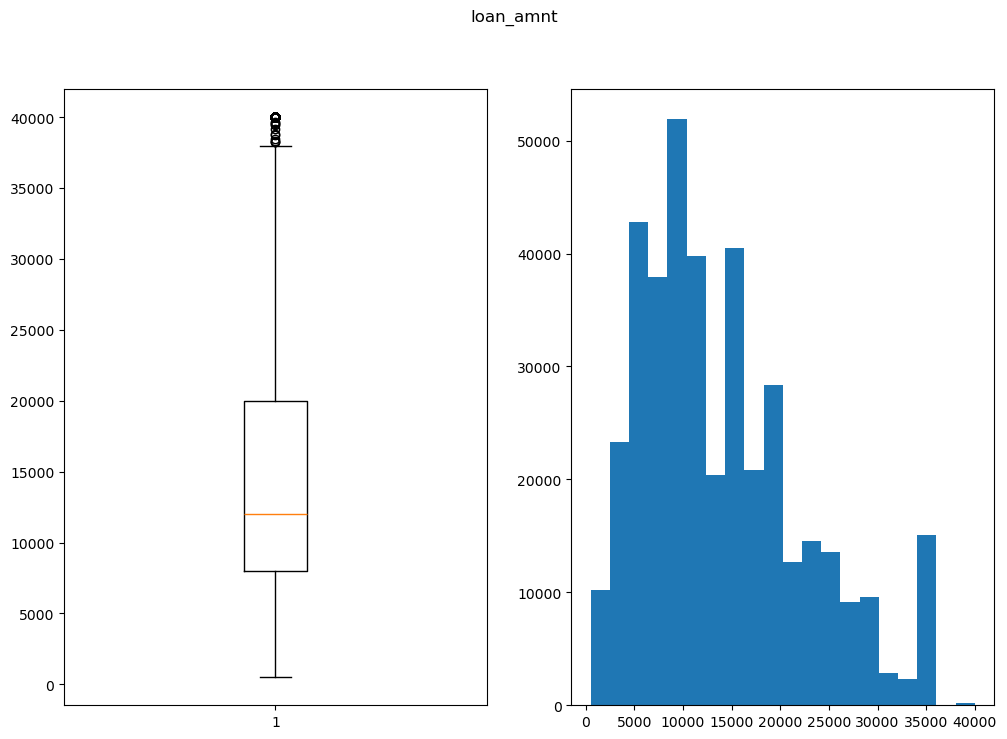

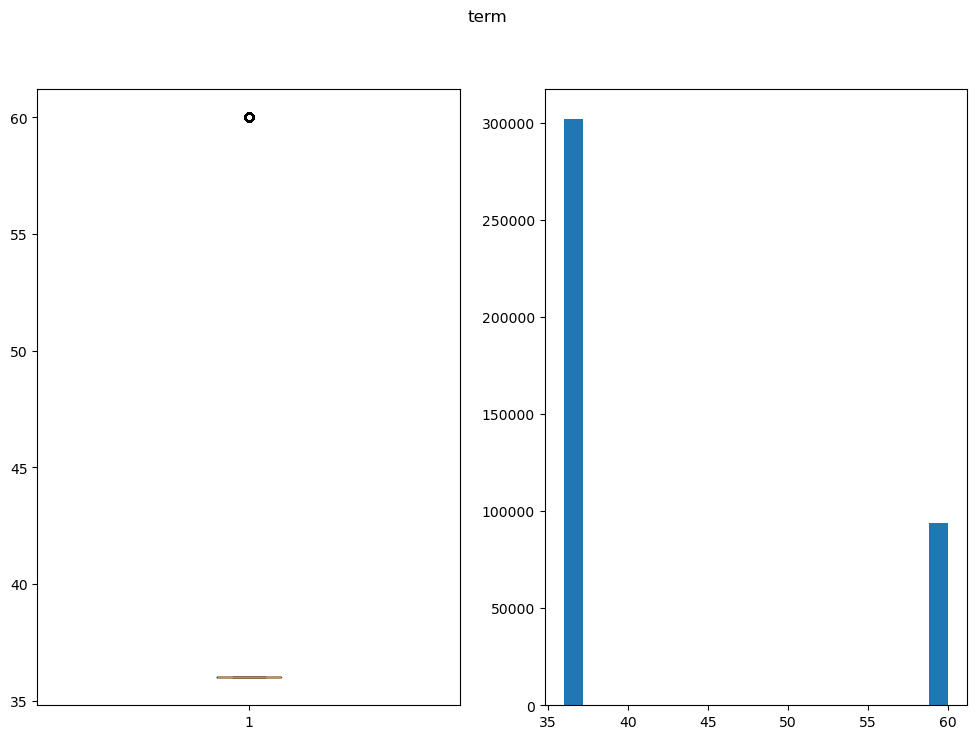

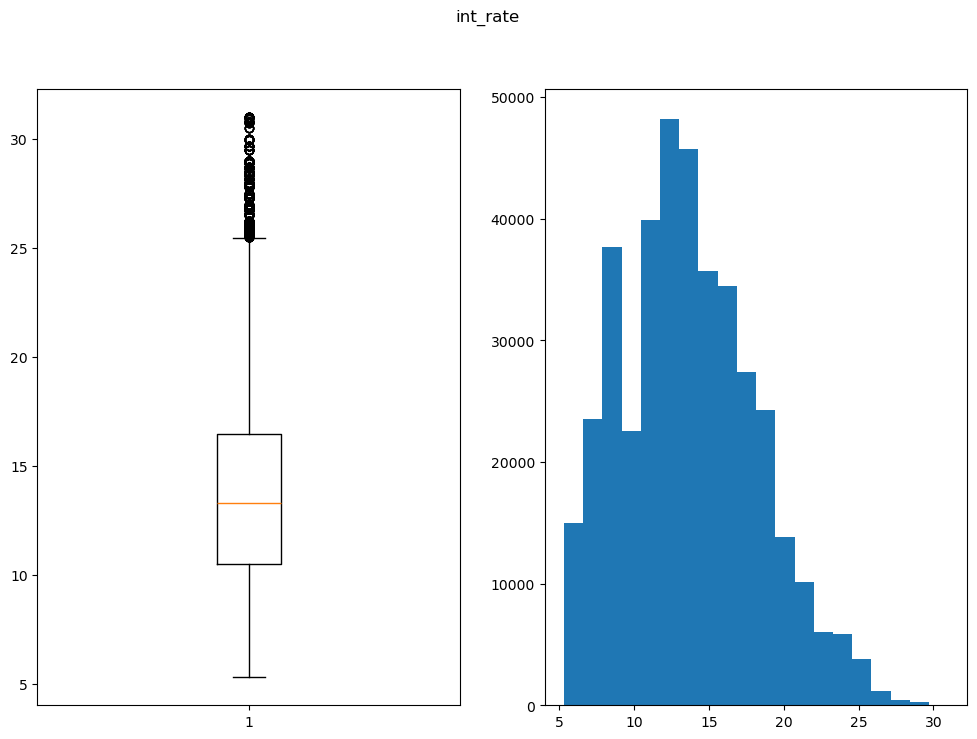

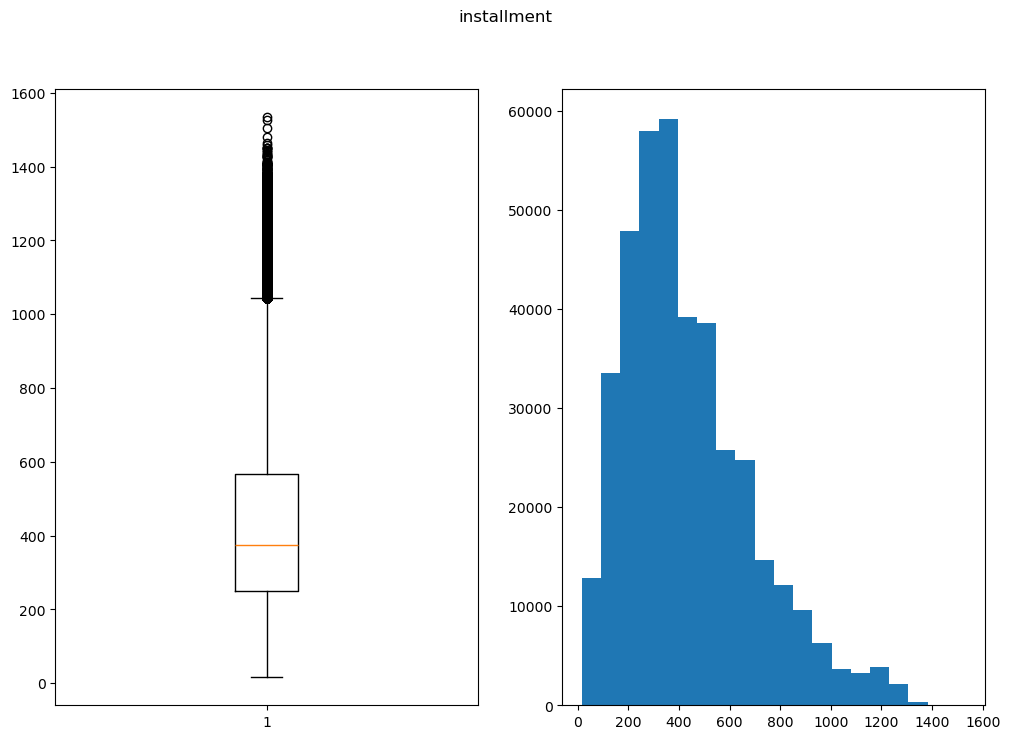

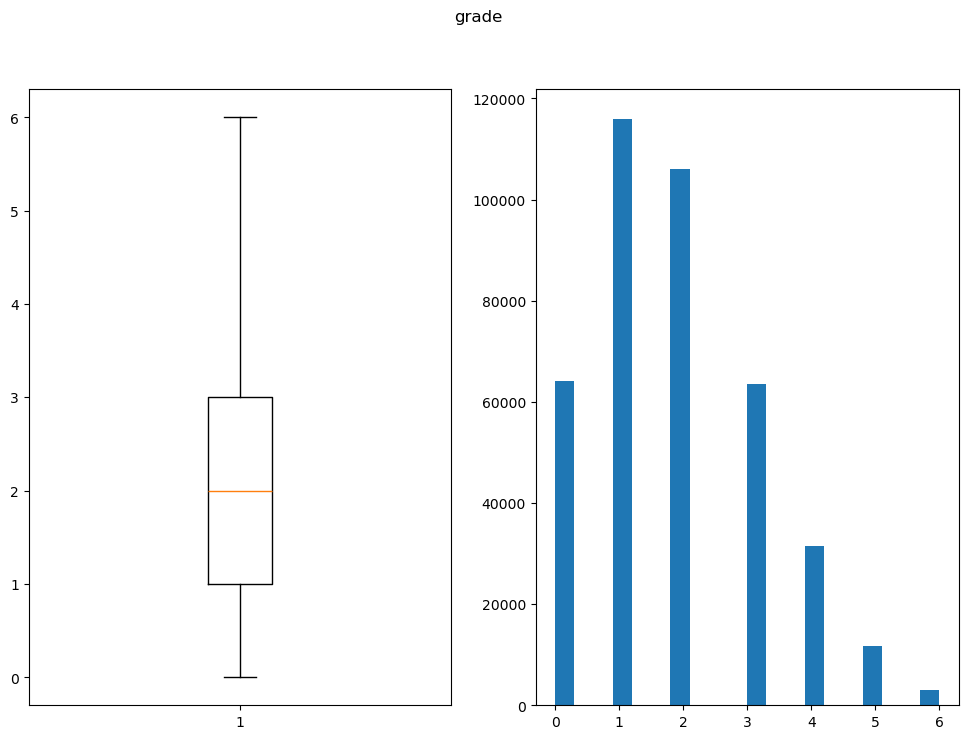

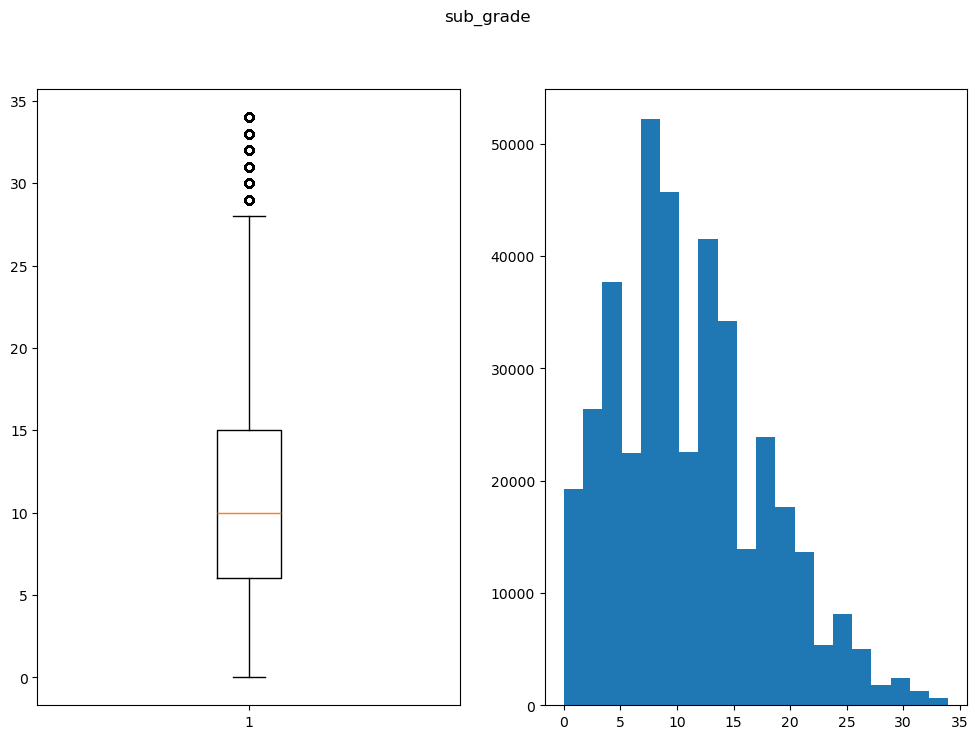

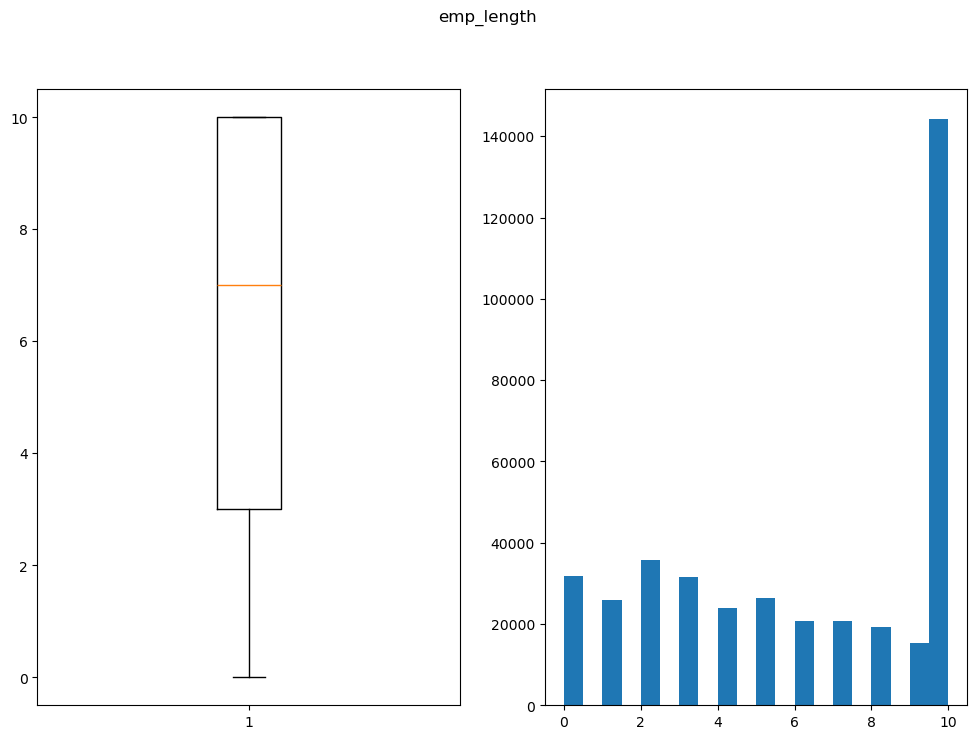

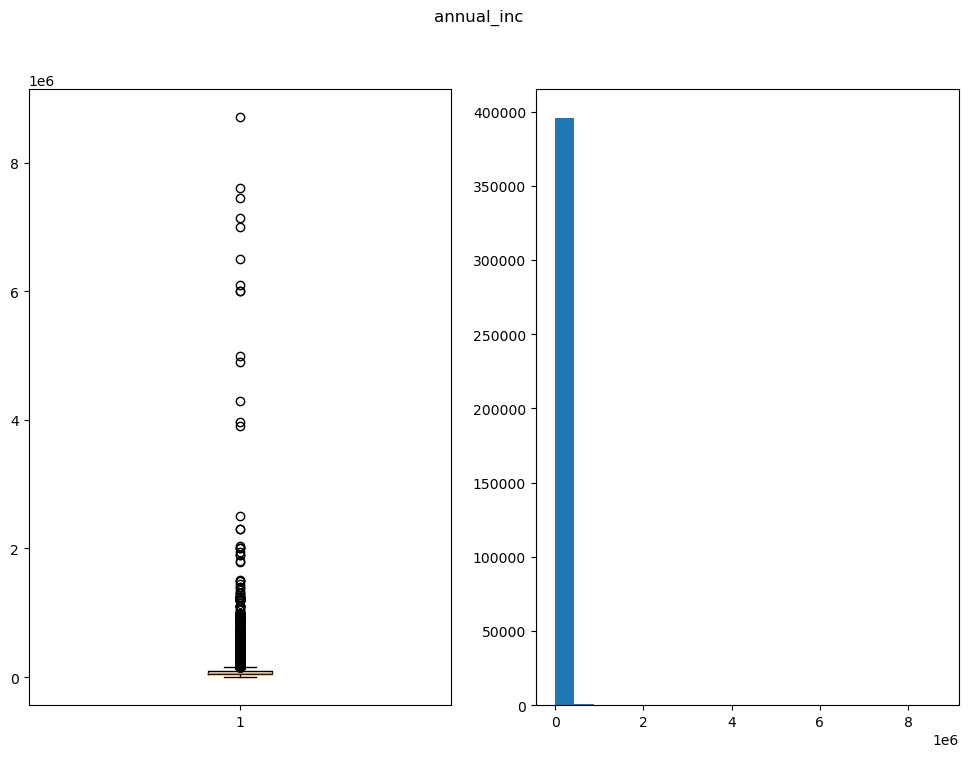

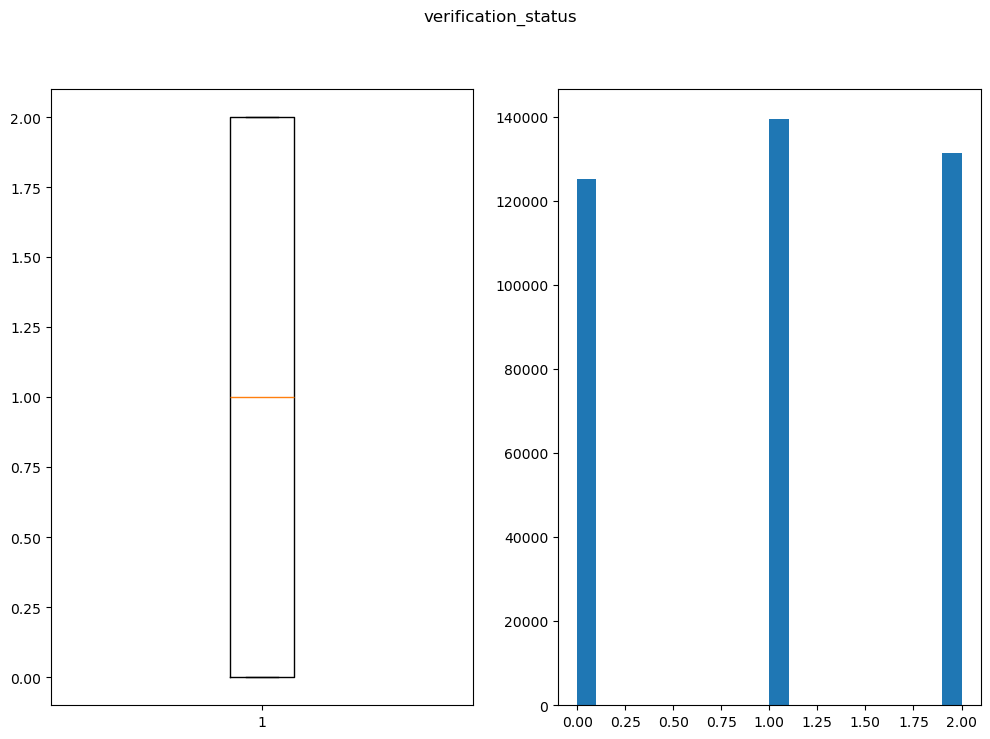

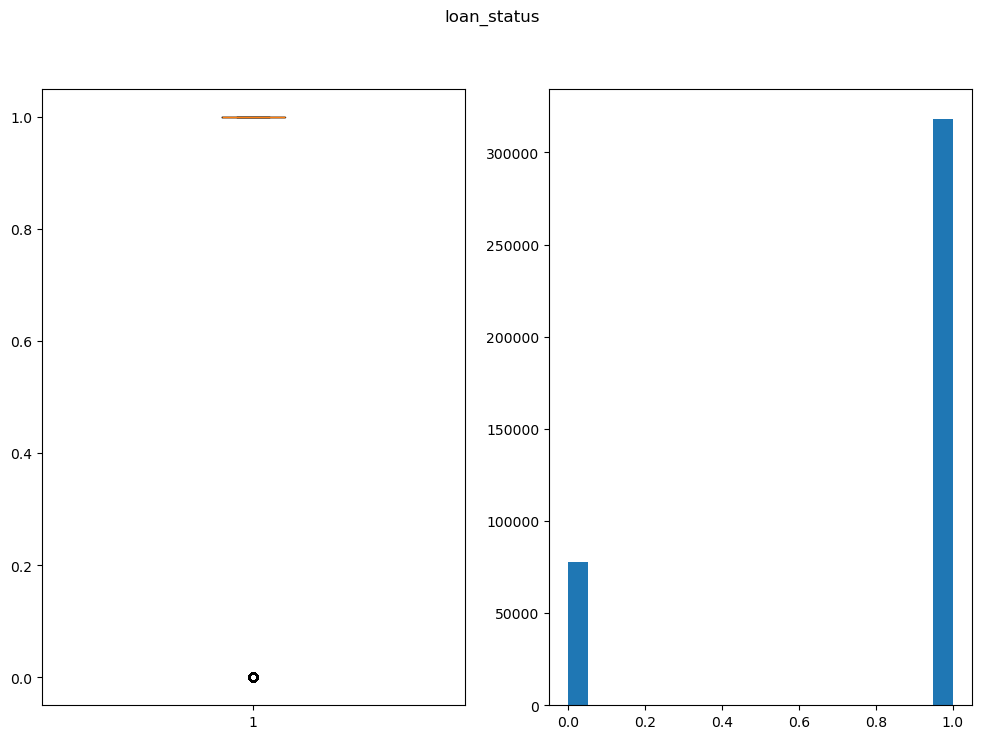

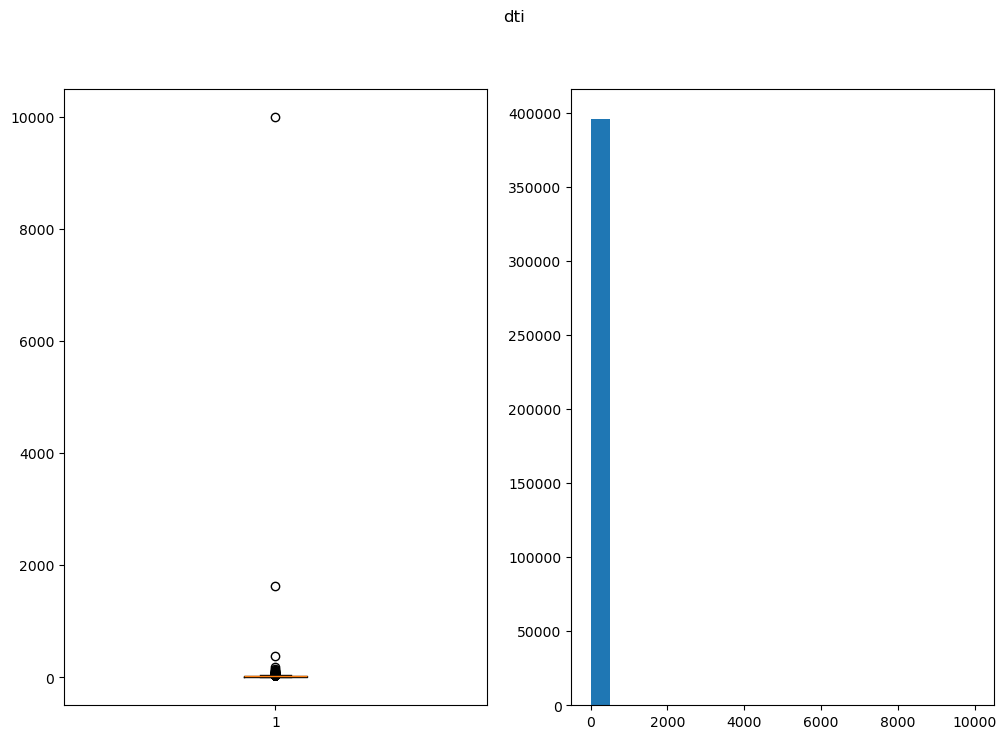

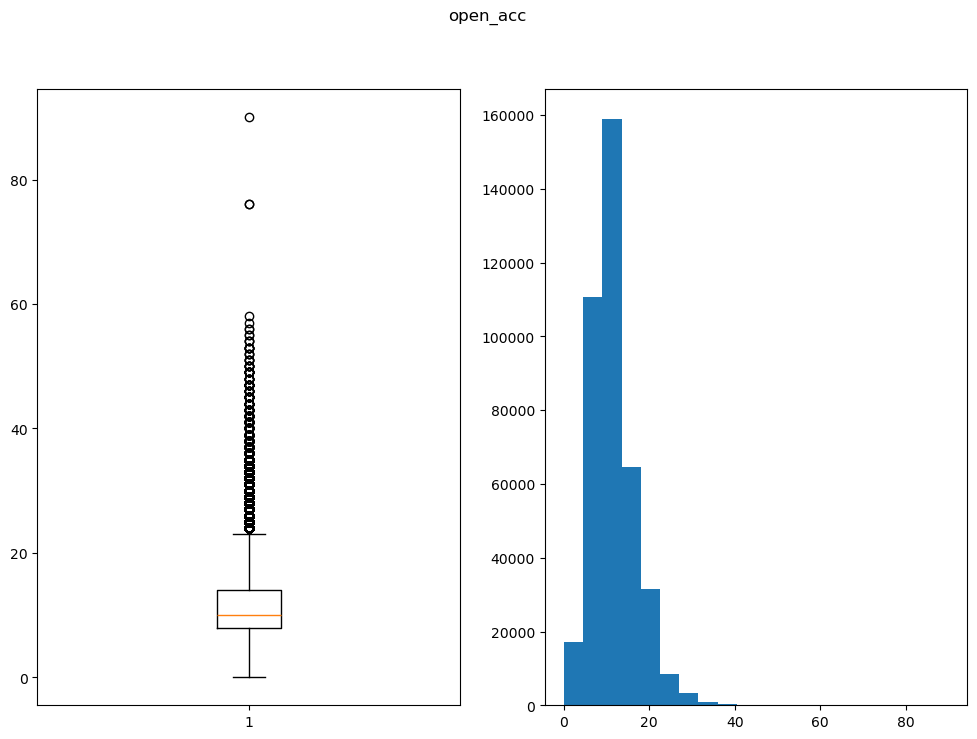

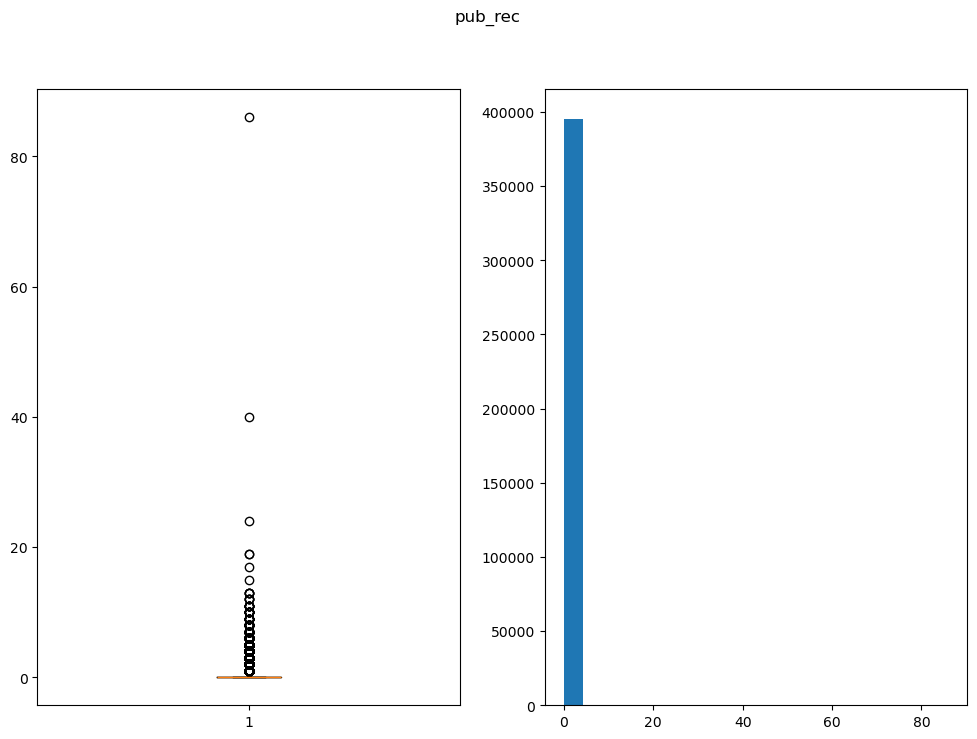

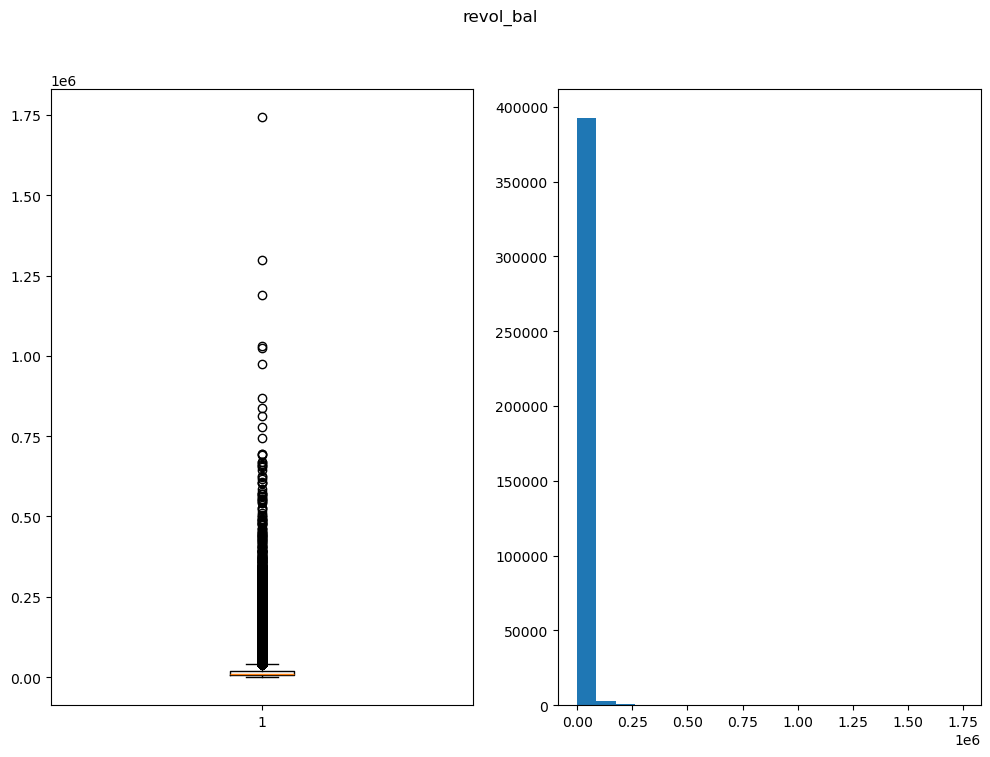

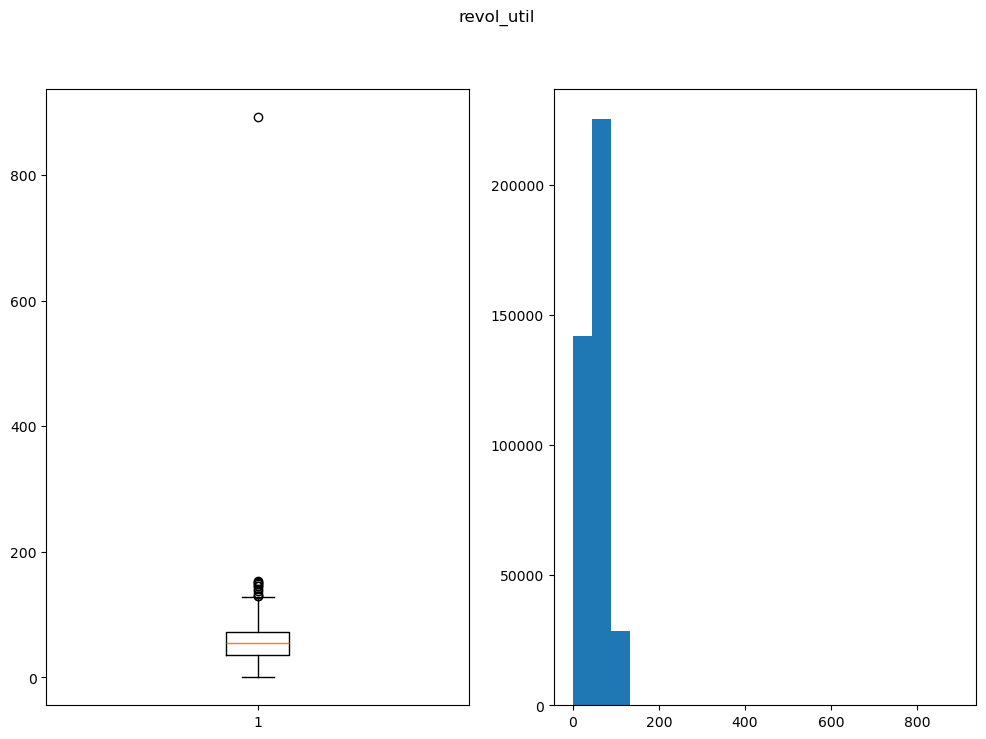

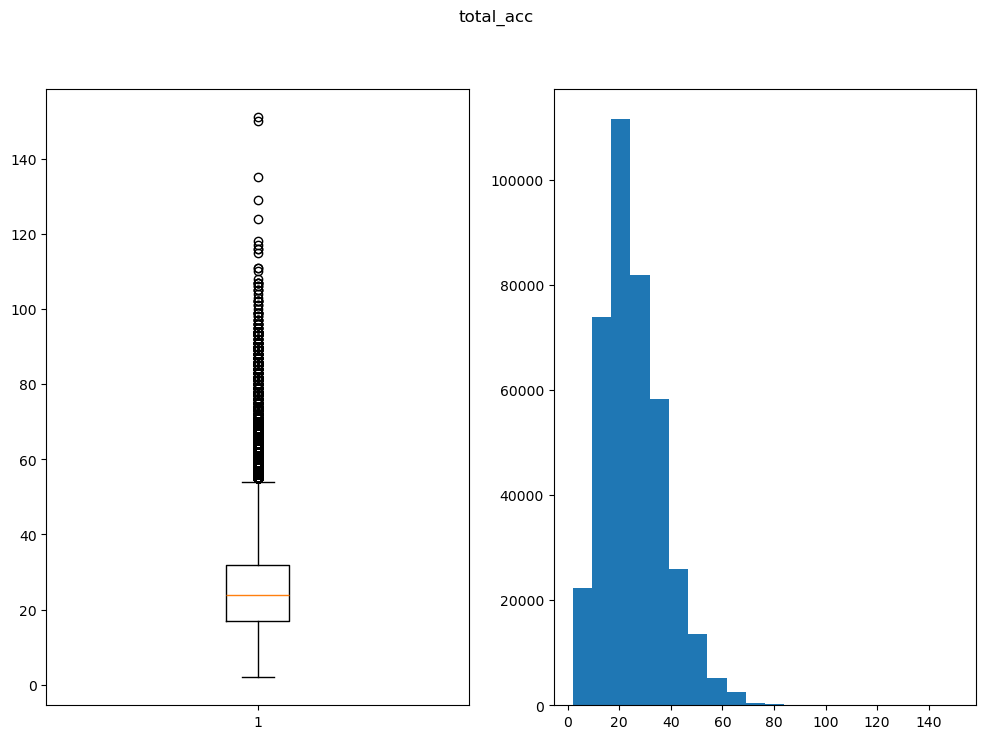

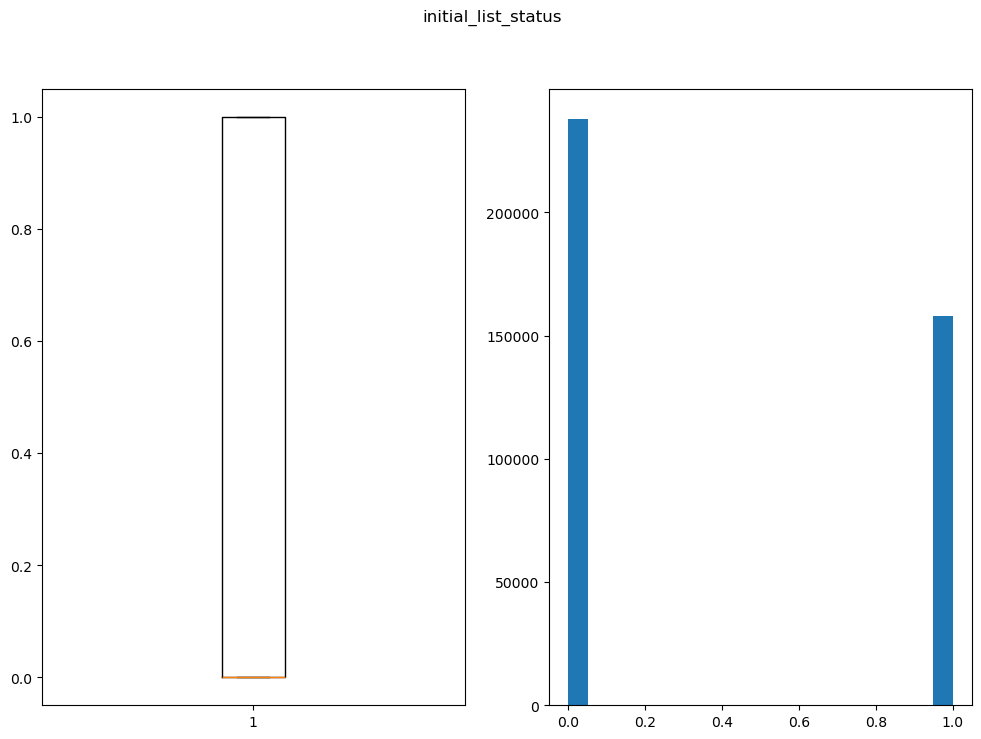

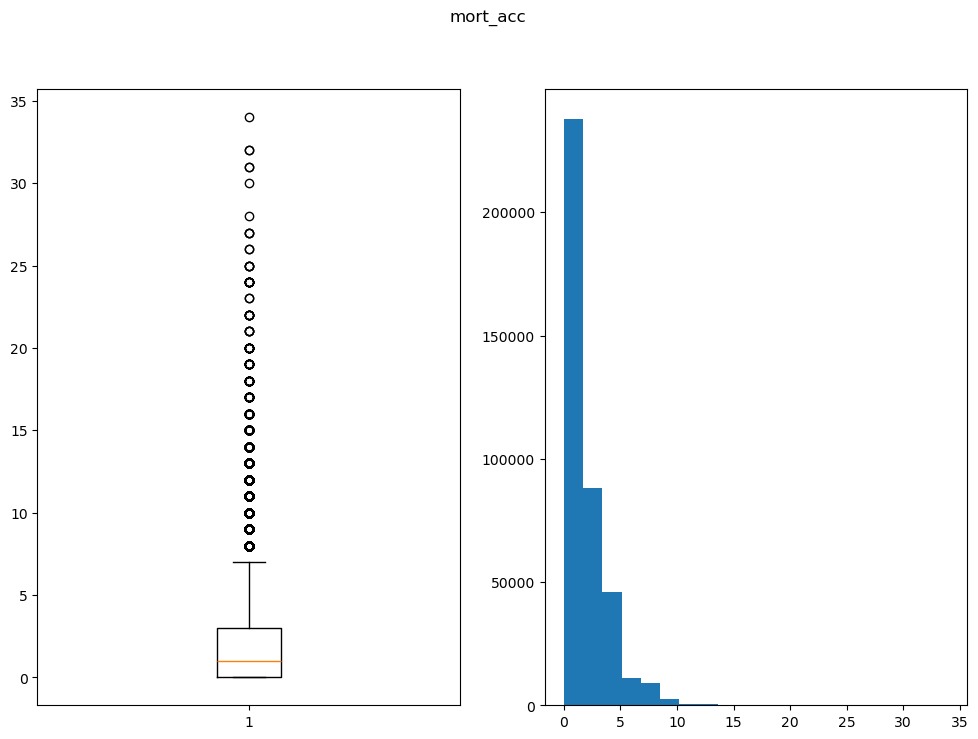

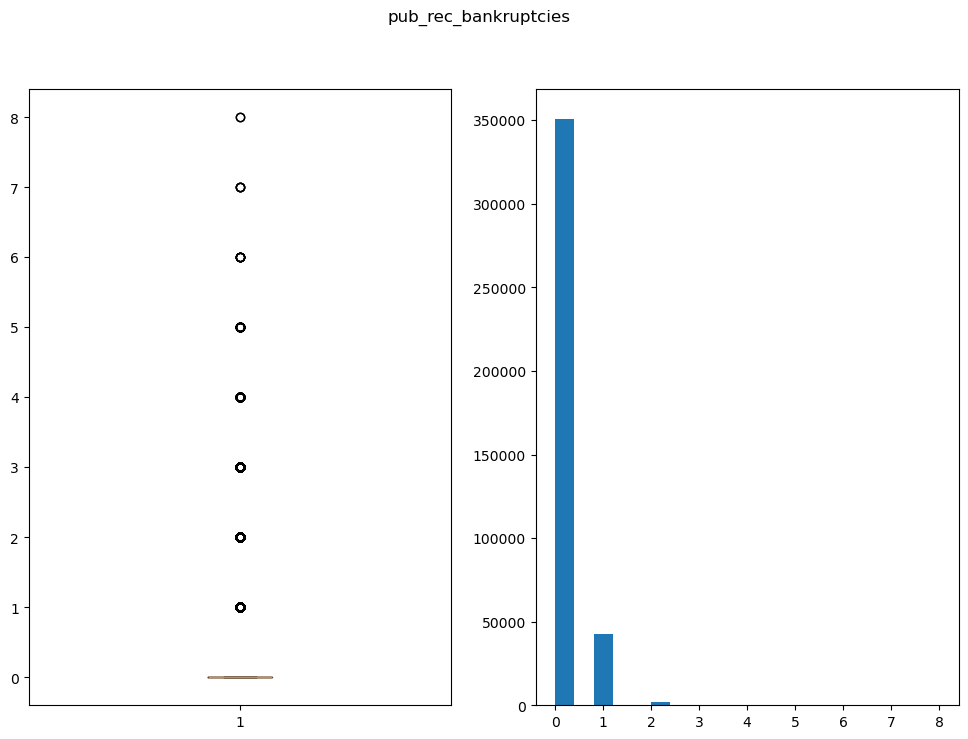

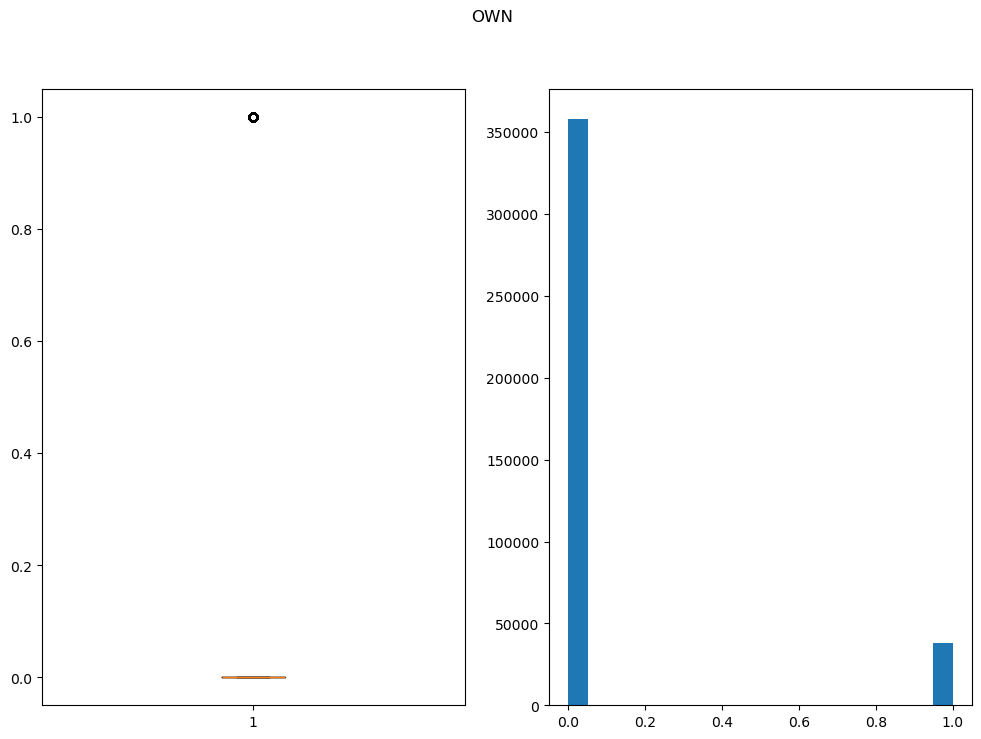

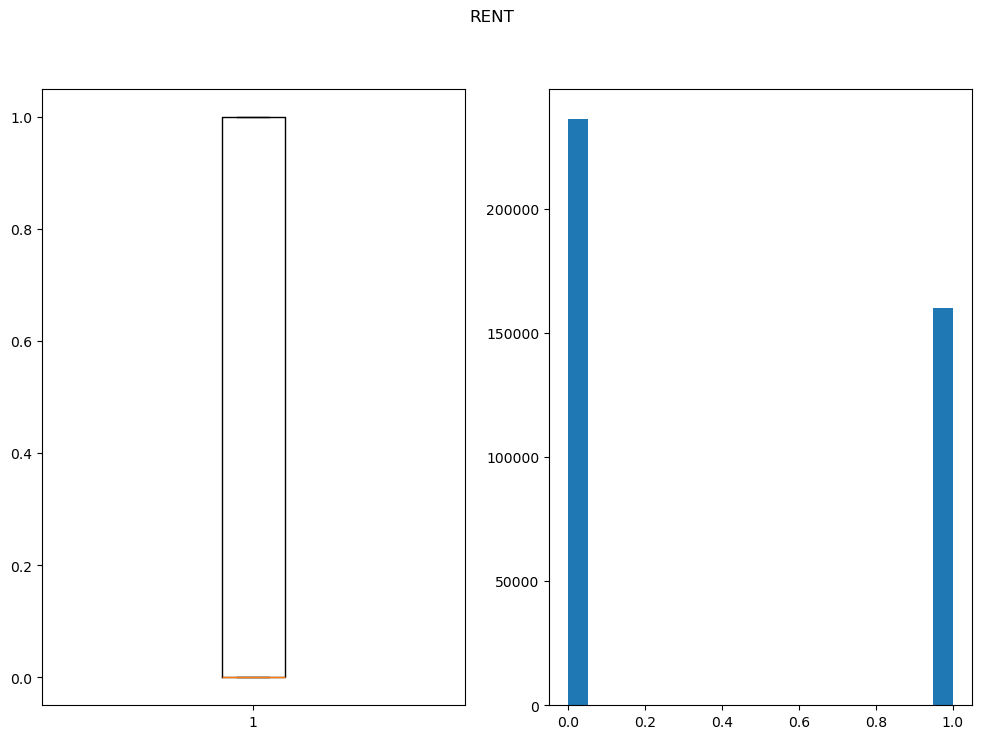

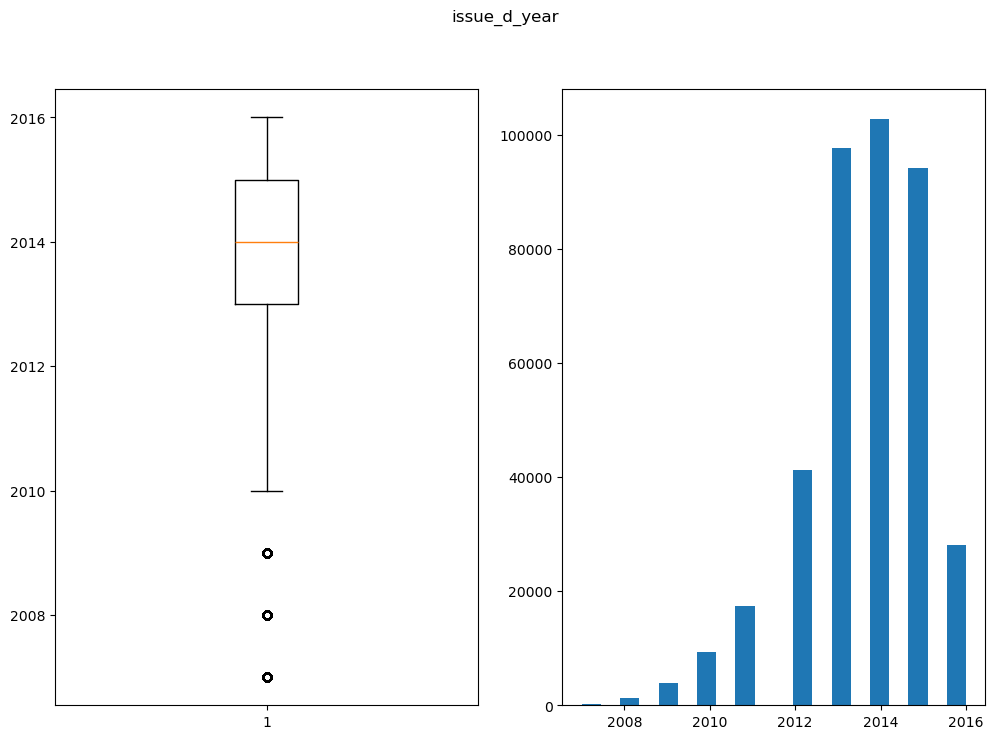

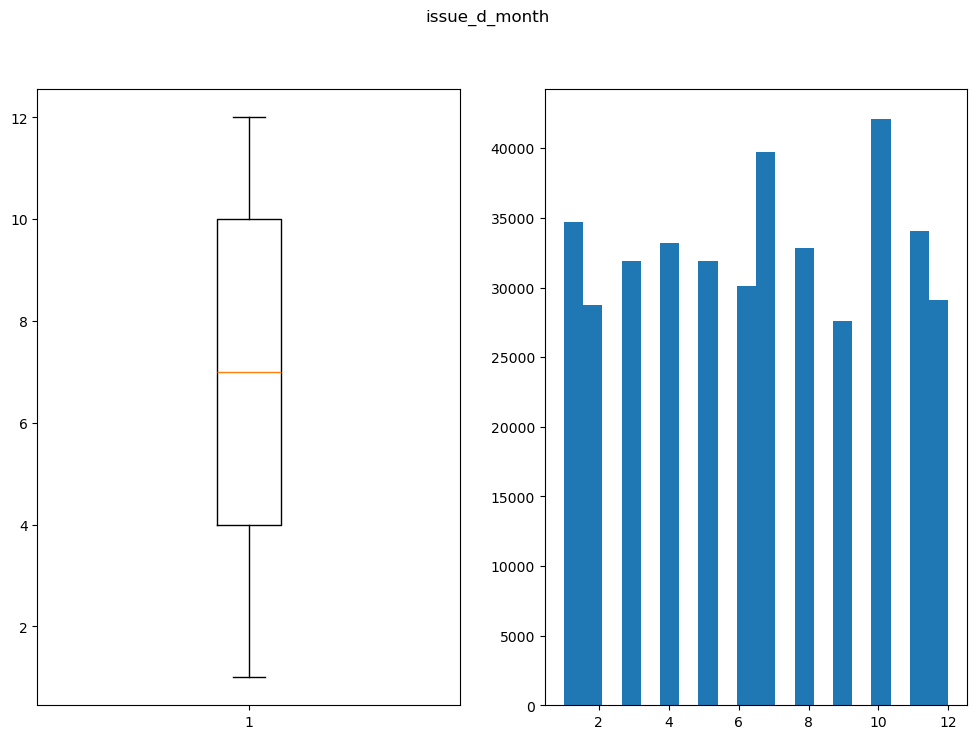

In [112]:
for i in df.columns:
    fig, ax=plt.subplots(1, 2, figsize=(12,8))
    ax[0].boxplot(df[i])
    ax[1].hist(df[i], bins =20)
    plt.suptitle(i)
    plt.show()

In [113]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'annual_inc', 'verification_status', 'loan_status', 'dti',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'mort_acc', 'pub_rec_bankruptcies', 'OWN',
       'RENT', 'issue_d_year', 'issue_d_month'],
      dtype='object')

In [114]:
df.drop(['OWN','pub_rec_bankruptcies','emp_length','term','loan_status'], axis=1, inplace= True)

In [115]:
df

,loan_amnt,int_rate,installment,grade,sub_grade,annual_inc,verification_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mort_acc,RENT,issue_d_year,issue_d_month
0,10000.0,11.44,329.48,1,8,117000.0,0,26.24,16.0,0.0,36369.0,41.8,25.0,1,0.0,1.0,2015,1
1,8000.0,11.99,265.68,1,9,65000.0,0,22.05,17.0,0.0,20131.0,53.3,27.0,0,3.0,0.0,2015,1
2,15600.0,10.49,506.97,1,7,43057.0,2,12.79,13.0,0.0,11987.0,92.2,26.0,0,0.0,1.0,2015,1
3,7200.0,6.49,220.65,0,1,54000.0,0,2.60,6.0,0.0,5472.0,21.5,13.0,0,0.0,1.0,2014,11
4,24375.0,17.27,609.33,2,14,55000.0,1,33.95,13.0,0.0,24584.0,69.8,43.0,0,1.0,0.0,2013,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,10.99,217.38,1,8,40000.0,2,15.63,6.0,0.0,1990.0,34.3,23.0,1,0.0,1.0,2015,10
396026,21000.0,12.29,700.42,2,10,110000.0,2,21.45,6.0,0.0,43263.0,95.7,8.0,0,1.0,0.0,2015,2
396027,5000.0,9.99,161.32,1,5,56500.0,1,17.56,15.0,0.0,32704.0,66.9,23.0,0,0.0,1.0,2013,10
396028,21000.0,15.31,503.02,2,11,64000.0,1,15.88,9.0,0.0,15704.0,53.8,20.0,0,5.0,0.0,2012,8


In [116]:
# input data
# we want to predict annual income x is everything accent column annual income
X=df.drop('annual_inc', axis =1)
X

,loan_amnt,int_rate,installment,grade,sub_grade,verification_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mort_acc,RENT,issue_d_year,issue_d_month
0,10000.0,11.44,329.48,1,8,0,26.24,16.0,0.0,36369.0,41.8,25.0,1,0.0,1.0,2015,1
1,8000.0,11.99,265.68,1,9,0,22.05,17.0,0.0,20131.0,53.3,27.0,0,3.0,0.0,2015,1
2,15600.0,10.49,506.97,1,7,2,12.79,13.0,0.0,11987.0,92.2,26.0,0,0.0,1.0,2015,1
3,7200.0,6.49,220.65,0,1,0,2.60,6.0,0.0,5472.0,21.5,13.0,0,0.0,1.0,2014,11
4,24375.0,17.27,609.33,2,14,1,33.95,13.0,0.0,24584.0,69.8,43.0,0,1.0,0.0,2013,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,10.99,217.38,1,8,2,15.63,6.0,0.0,1990.0,34.3,23.0,1,0.0,1.0,2015,10
396026,21000.0,12.29,700.42,2,10,2,21.45,6.0,0.0,43263.0,95.7,8.0,0,1.0,0.0,2015,2
396027,5000.0,9.99,161.32,1,5,1,17.56,15.0,0.0,32704.0,66.9,23.0,0,0.0,1.0,2013,10
396028,21000.0,15.31,503.02,2,11,1,15.88,9.0,0.0,15704.0,53.8,20.0,0,5.0,0.0,2012,8


In [117]:
y=df['annual_inc']

In [118]:
X=X.values
y=y.values

In [119]:
type(X)

numpy.ndarray

In [120]:
from sklearn.preprocessing import StandardScaler

In [121]:
scale= StandardScaler() # data single scale pe nahi he matlanb kahi 0.1, 1

In [122]:
# we use X_transformed to transform all values from every column into single scale like 0 to 10 or 0 to 1.
X_transformed= scale.fit_transform(X)
X_transformed

array([[-0.49224315, -0.49179907, -0.40829071, ...,  1.21591137,
         0.92522421, -1.62060325],
       [-0.73155115, -0.36881576, -0.66275026, ..., -0.82242837,
         0.92522421, -1.62060325],
       [ 0.17781923, -0.70422477,  0.29960938, ...,  1.21591137,
         0.92522421, -1.62060325],
       ...,
       [-1.09051314, -0.81602778, -1.07897908, ...,  1.21591137,
        -0.4245553 ,  1.00589337],
       [ 0.82395082,  0.37355619,  0.28385522, ..., -0.82242837,
        -1.09944505,  0.42222746],
       [-1.44947513, -0.00657403, -1.45125579, ...,  1.21591137,
        -2.44922456, -0.16143846]])

In [123]:
from sklearn.model_selection import train_test_split

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.3, random_state=10)

In [125]:
X_train.shape

(277221, 17)

In [126]:
X_test.shape

(118809, 17)

In [127]:
y_train.shape

(277221,)

In [128]:
y_test.shape

(118809,)

In [129]:
from sklearn.linear_model import LinearRegression

In [130]:
lr=LinearRegression() # model ko bolay samajjh le
lr.fit(X_train, y_train)

LinearRegression()

In [131]:
y_pred_train = lr.predict(X_train) # 70 questions jo model ne padhe he wo verify karay barabar paday ki nahi

In [132]:
import sklearn.metrics as sm

In [133]:
sm.mean_squared_error(y_train, y_pred_train) # mean squared error bata ta hai ki kitna diff he ytrain aur y pred me

2991708817.5326242

In [134]:
sm.r2_score(y_train, y_pred_train) # r2 score agar 1 he toh best he,r2 batata he ki model kis rate se sikh raha he

0.19558006169248343

In [135]:
#SVR
from sklearn.svm import SVR

In [136]:
model_svr=SVR()

In [137]:
#model_svr.fit(X_train, y_train)

In [138]:
#y_svr_train = model_svr.predict(X_train)

In [139]:
#sm.mean_squared_error(y_train, y_pred_train)

In [142]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(max_depth=14)
dt.fit(X_train, y_train)
dt_pred_training=dt.predict(X_train)

In [143]:
sm.mean_squared_error(y_train, dt_pred_training)

836444514.0854659

In [145]:
sm.r2_score(y_train, dt_pred_training)

0.7750942068709687

In [146]:
 dt_pred_testing=dt.predict(X_test)

In [147]:
sm.mean_squared_error(y_test, dt_pred_testing)

3592559488.946359

In [148]:
sm.r2_score(y_test, dt_pred_testing)

0.09871681341998251